# 📝 Introductory exercise for sample grouping

This exercise aims at highlighting issues that one could encounter when
discarding grouping pattern existing in a dataset.

We will use the digits dataset which includes some grouping pattern.

In [1]:
from sklearn.datasets import load_digits

data, target = load_digits(return_X_y=True, as_frame=True)

We can display an interactive diagram with the following command:

In [2]:
from sklearn import set_config
set_config(display='diagram')

The first step is to create a model. Use a machine learning pipeline
composed of a scaler followed by a logistic regression classifier.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), 
    LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Then, create a a `KFold` object making sure that the data will not be
shuffled during the cross-validation. Use the previous model, data, and
cross-validation strategy defined to estimate the statistical performance of
the model.

In [4]:
%%time
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(shuffle=False)
test_score_no_shuffle = cross_val_score(
    model, data, target, cv=cv, n_jobs=-1)
print(f"The average accuracy is "
    f"{test_score_no_shuffle.mean():.3f} +/- "
    f"{test_score_no_shuffle.std():.3f}")

The average accuracy is 0.921 +/- 0.028
CPU times: user 39.1 ms, sys: 81.6 ms, total: 121 ms
Wall time: 1.14 s


Finally, perform the same experiment by shuffling the data within the
cross-validation. Draw some conclusion regarding the dataset.

In [5]:
%%time
cv = KFold(shuffle=True)
test_score_with_shuffle = cross_val_score(
    model, data, target, cv=cv, n_jobs=-1)
print(f"The average accuracy is "
    f"{test_score_with_shuffle.mean():.3f} +/- "
    f"{test_score_with_shuffle.std():.3f}")

The average accuracy is 0.972 +/- 0.010
CPU times: user 19.3 ms, sys: 744 µs, total: 20.1 ms
Wall time: 871 ms


We observe that shuffling the data improves the mean accuracy. We could go a little further and plot the distribution of the testing score. We can first concatenate the test scores.

In [6]:
import pandas as pd

all_scores = pd.DataFrame(
    [test_score_no_shuffle, test_score_with_shuffle],
    index=["KFold without shuffle", "KFold with shuffle"]).T
all_scores

,KFold without shuffle,KFold with shuffle
0,0.922222,0.975000
1,0.883333,0.977778
2,0.941504,0.974930
3,0.961003,0.977716
4,0.896936,0.952646


Let's plot the distribution now.

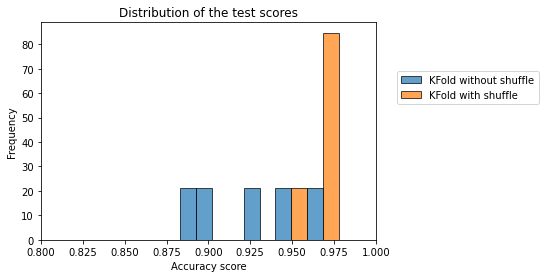

In [7]:
import matplotlib.pyplot as plt

all_scores.plot.hist(bins=10, edgecolor='black', 
    density=True, alpha=0.7)
plt.xlim([0.8, 1.0])
plt.xlabel("Accuracy score")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Distribution of the test scores")

The cross-validation testing error that uses the shuffling has less variance than the one that does not impose any shuffling. It means that some specific fold leads to a low score in this case.